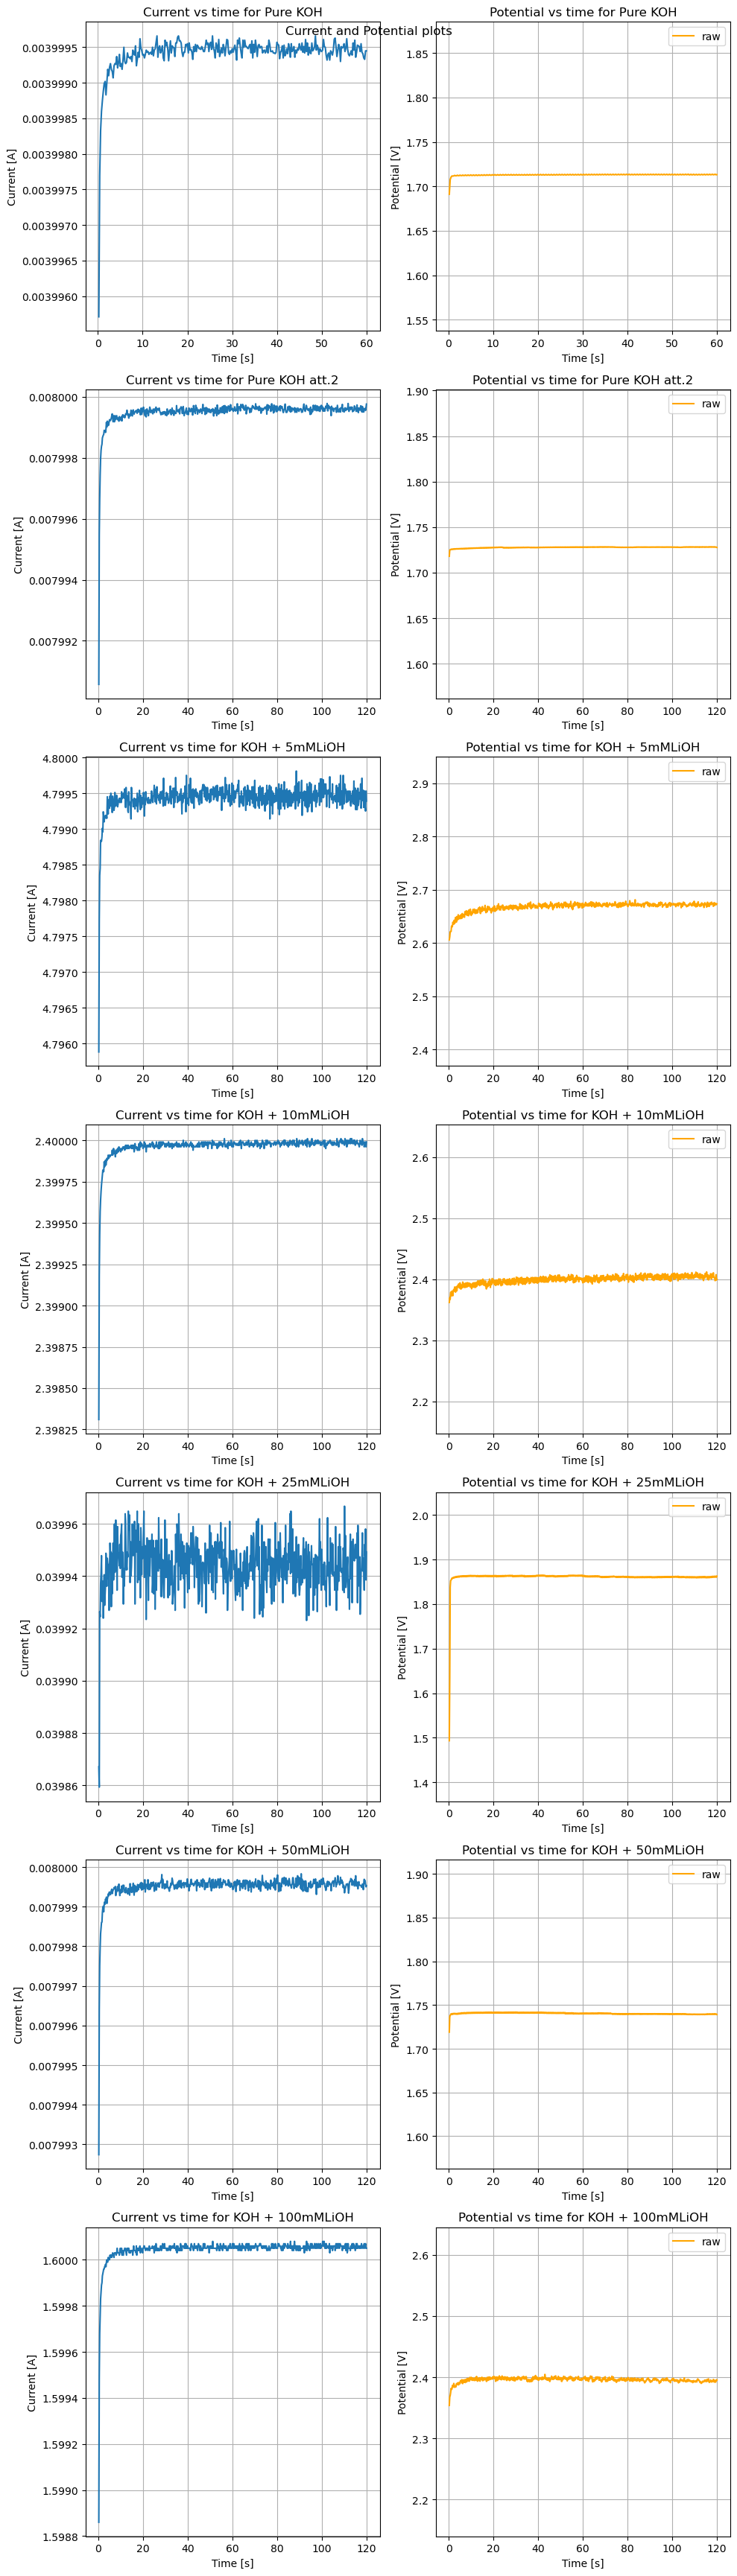

In [378]:
from ProcessingClass import Measurement
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline as cs
from scipy.optimize import curve_fit
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.interpolate import griddata



datetimes_start = [
                    (2024, 11, 15, 12,  0, 0), 
                    (2024, 11, 27, 13, 30, 0),
                    (2024, 11, 29, 11,  0, 0), 
                    (2024, 11, 15, 16,  0, 0), 
                    (2024, 11, 22, 15,  0, 0),  
                    (2024, 11, 19, 12,  0, 0), 
                    (2024, 11, 22, 12,  0, 0)
                    ]

datestimes_end =  [
                    (2024, 11, 15, 13, 30, 0),
                    (2024, 11, 27, 19,  0, 0), 
                    (2024, 11, 29, 14,  0, 0), 
                    (2024, 11, 15, 18, 30, 0), 
                    (2024, 11, 22, 18,  0, 0),  
                    (2024, 11, 19, 14, 30, 0), 
                    (2024, 11, 22, 14, 30, 0)
                    ]

foldernames = [
                'experiment1 6.5M KOH', 
                'exp7-KOH-Run2',
                'exp8 6.5MKOH plus 5mMLiOH',
                'experiment 2 6.5M KOH 10mM LiOH', 
                'exp6-6.5MKOHplus25mMLiOH',
                'exp3- 6.5MKOHplus50mM LiOH', 
                'experiment 5- 6.mKOHplus100mM LiOH'
                ]

nice_titles = [
                'Pure KOH', 
                'Pure KOH att.2',
                'KOH + 5mMLiOH',
                'KOH + 10mMLiOH', 
                'KOH + 25mMLiOH', 
                'KOH + 50mMLiOH', 
                'KOH + 100mMLiOH'
                ]
experiments = []

for idx in range(len(foldernames)):
    exp = Measurement(datetimes_start[idx], datestimes_end[idx], foldernames[idx])
    experiments.append(exp)

fig, ax = plt.subplots(ncols = 2, nrows = len(experiments), figsize = (10, 5*len(experiments)))
ax = ax.flatten()
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    data = exp.TRScans[0]
    fig.suptitle('Current and Potential plots')
    ax[i*2].set_title('Current vs time for ' + nice_titles[i])
    ax[i*2].plot(data['time'], data['I'])
    ax[i*2].grid()
    ax[i*2].set_xlabel('Time [s]')
    ax[i*2].set_ylabel('Current [A]')
    ax[i*2+1].set_title('Potential vs time for ' + nice_titles[i])
    ax[i*2+1].plot(data['time'], data['V'], label = 'raw', color = 'orange')
    ax[i*2+1].grid()
    ax[i*2+1].set_xlabel('Time [s]')
    ax[i*2+1].set_ylabel('Potential [V]')
    ax[i*2+1].legend()
    ax[i*2+1].set_ylim(min(data['V'])/1.1, max(data['V'])*1.1)

fig.tight_layout()

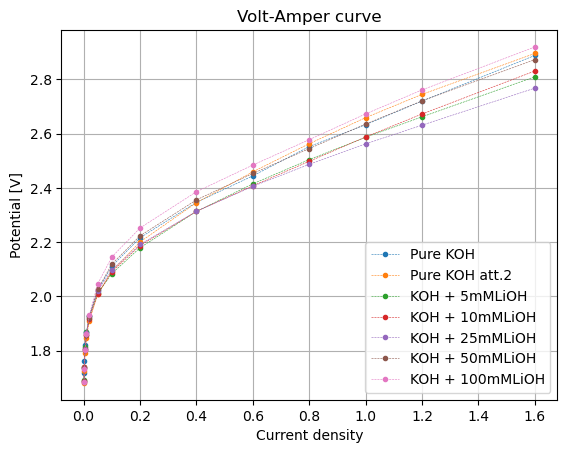

In [379]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.VAC_dataframe.sort_values(by = 'J')
    plt.plot(exp.VAC_dataframe['J'], exp.VAC_dataframe['V'], label = nice_titles[i],  marker = '.', linestyle = '--', lw = 0.4)


plt.grid(which='both')
plt.title('Volt-Amper curve')
plt.xlabel('Current density')
plt.ylabel('Potential [V]')
plt.legend()

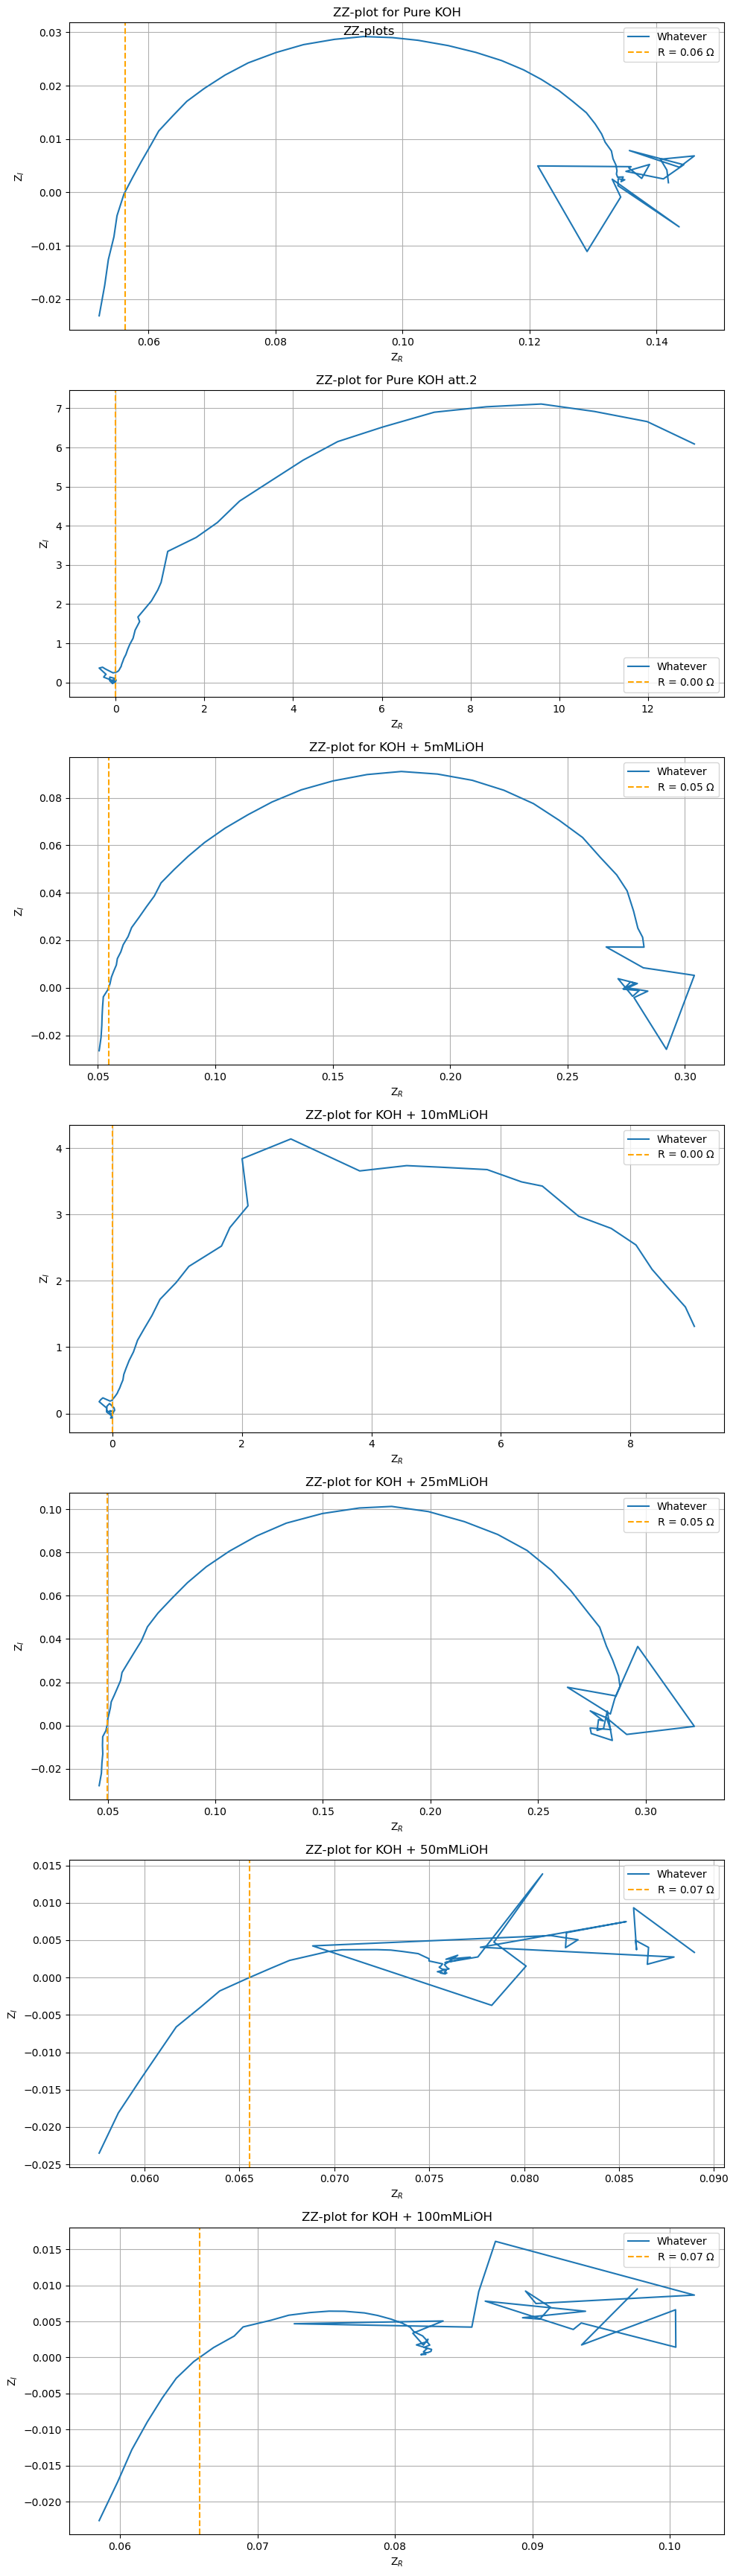

In [380]:
fig, ax = plt.subplots(nrows = len(experiments), figsize = (10, 5*len(experiments)))


#SPELL IT FOR ME PLS
fig.suptitle('ZZ-plots')



for i in range(max(1,len(experiments))):
    exp = experiments[i]
    data = exp.ZZplots[0]
    

    #Here too
    ax[i].set_title('ZZ-plot for ' + nice_titles[i])
    ax[i].plot(data['Zr'], data['Zi'],  label = 'Whatever')
    ax[i].grid()
    ax[i].set_xlabel('Z$_R$')
    ax[i].set_ylabel('Z$_I$')
    ax[i].axvline(exp.rs[0], label = f'R = {exp.rs[0]:.2f} $\\Omega$', color = 'orange', linestyle = '--')
    ax[i].legend()

fig.tight_layout()


Text(0, 0.5, 'Ohmic resistance [$\\Omega$]')

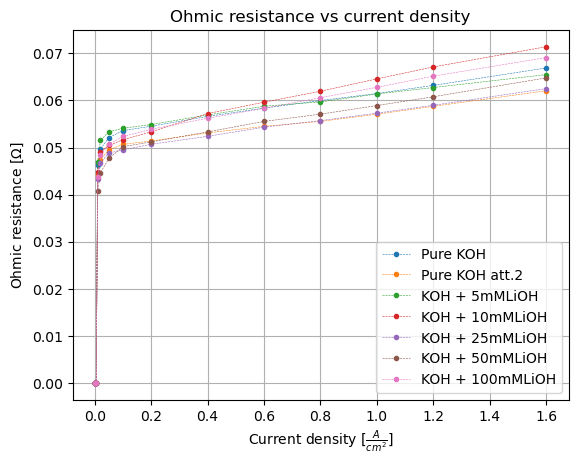

In [381]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    plt.plot(exp.JR_dataframe['J'], exp.JR_dataframe['R'], label = nice_titles[i], marker = '.', linestyle = '--', lw = 0.4)

plt.grid(which='both')
plt.legend(loc = 'lower right')
plt.title('Ohmic resistance vs current density')
plt.xlabel('Current density [$\\frac{A}{cm^2}$]')
plt.ylabel('Ohmic resistance [$\\Omega$]')

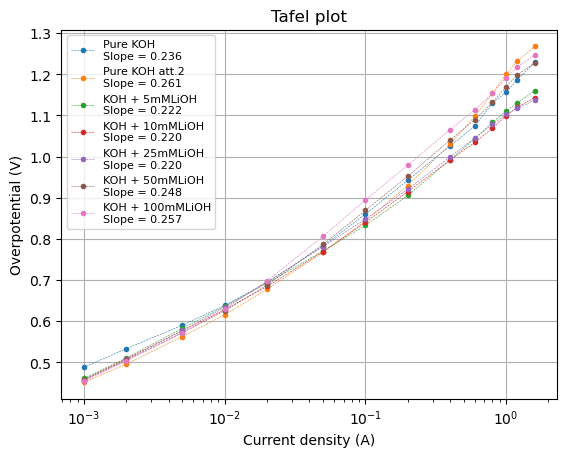

In [382]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    plt.plot(exp.JR_dataframe['J'], exp.overpotential, label = nice_titles[i] + f'\nSlope = {exp.slope:.3f}',  marker = '.', linestyle = '--', lw = 0.4)

plt.xscale('log')
plt.grid()
plt.title('Tafel plot')
plt.xlabel('Current density (A)')
plt.ylabel('Overpotential (V)')
plt.legend(fontsize = 8)

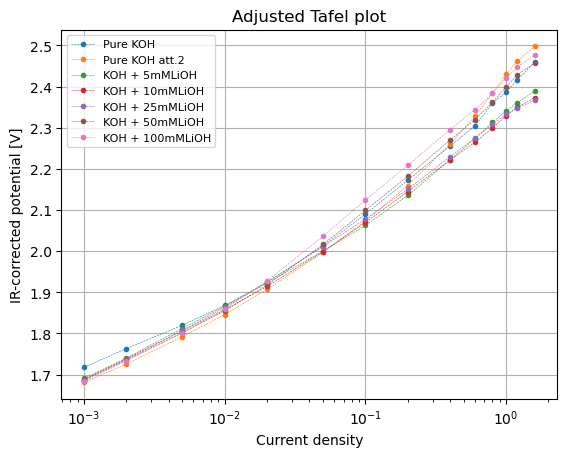

In [383]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    overpotential_adjusted = [op + 1.23 for op in exp.overpotential]
    plt.plot(exp.JR_dataframe['J'], overpotential_adjusted, label = nice_titles[i] ,  marker = '.', linestyle = '--', lw = 0.4)


plt.grid()
plt.title('Adjusted Tafel plot')
plt.xlabel('Current density')
plt.ylabel('IR-corrected potential [V]')
plt.legend(fontsize = 8)
plt.xscale('log')

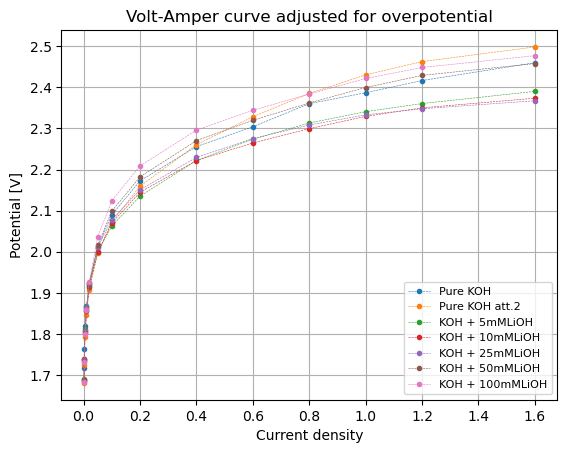

In [384]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    overpotential_adjusted = [op + 1.23 for op in exp.overpotential]
    plt.plot(exp.JR_dataframe['J'], overpotential_adjusted, label = nice_titles[i] ,  marker = '.', linestyle = '--', lw = 0.4)


plt.grid()
plt.title('Volt-Amper curve adjusted for overpotential')
plt.xlabel('Current density')
plt.ylabel('Potential [V]')
plt.legend(fontsize = 8)

In [385]:
experiments_toplot = experiments[1:]

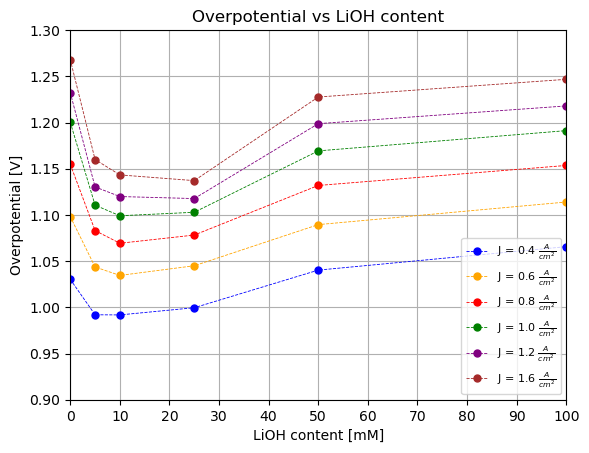

In [387]:
reqs = np.array([0.4, 0.6, 0.8, 1, 1.2, 1.6])
li_content = np.array([0, 5,  10, 25, 50,100])
colors = ['blue', 'orange', 'red', 'green', 'purple', 'brown', 'pink', 'cyan']
overpotentials = []
interpolate = False
baseline = []

for i in range(len(reqs)):
    req = reqs[i]
    baseline.append(experiments_toplot[0].for_computation[experiments_toplot[0].for_computation['J JR'] == req]['Overpotential'].values[0])

baseline = np.array(baseline)

for i in range(len(reqs)):
    req = reqs[i]
    list = []
    for exper in experiments_toplot:
        list.append(exper.for_computation[exper.for_computation['J JR'] == req]['Overpotential'].values[0])
    list = np.array(list)
        
    if interpolate:
        spline = cs(li_content, list)
        plt.scatter(li_content, list, label = f'J = {req} '+'$\\frac{A}{cm^2}$', marker = '.', s = 100, color = colors[i])
        x = np.linspace(min(li_content), max(li_content), 100)
        plt.plot(x, spline(x), color = colors[i], linestyle = '--', lw = 0.4)
    else:
        overpotentials.append(list)
        plt.plot(li_content, list, label = f'J = {req} '+'$\\frac{A}{cm^2}$', marker = '.', markersize = 10, linestyle = '--', lw = 0.6, color = colors[i])


plt.grid()
plt.xlabel('LiOH content [mM]')
plt.ylabel('Overpotential [V]')
plt.title('Overpotential vs LiOH content')
plt.legend(fontsize = 8, loc = 'lower right')
plt.xlim(0, 100)
plt.ylim(0.9, 1.3)
plt.xticks(np.linspace(0,100,11))
plt.show()

In [388]:
overpotentials = np.array(overpotentials).flatten()
overpotentials = overpotentials - np.array(np.repeat(baseline, len(reqs))).flatten()
overpotentials *=1000

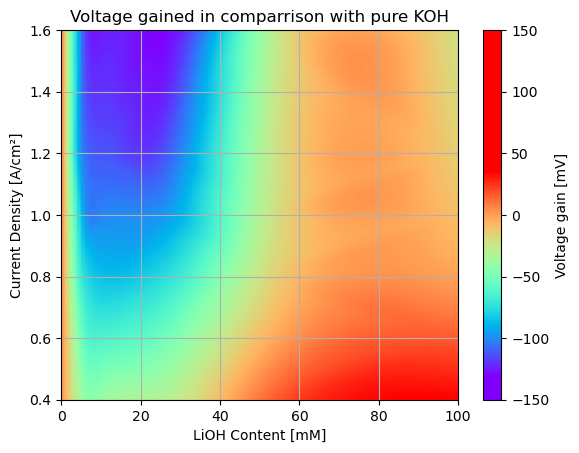

In [389]:
x, y = np.meshgrid(li_content, reqs)
x_new = np.linspace(li_content.min(), li_content.max(), 100)  # Fine LiOH axis
y_new = np.linspace(reqs.min(), reqs.max(), 200)  # Fine J axis
x_fine, y_fine = np.meshgrid(x_new, y_new)

# Perform interpolation
overpotentials_smooth = griddata(
    (x.flatten(), y.flatten()), overpotentials,  (x_fine, y_fine), method='cubic'
)

# Plot the heatmap
plt.imshow(overpotentials_smooth, aspect='auto', cmap='rainbow', origin='lower',
           extent=[li_content.min(), li_content.max(),
                   reqs.min(), reqs.max()])
plt.colorbar(label="Voltage gain [mV]", values=np.linspace(-0.15, 0.15, 6000)*1000, ticks = np.linspace(-0.15, 0.15, 7)*1000)
plt.xlabel("LiOH Content [mM]")
plt.ylabel("Current Density [A/cm²]")
plt.title("Voltage gained in comparrison with pure KOH")
plt.grid()
plt.show()

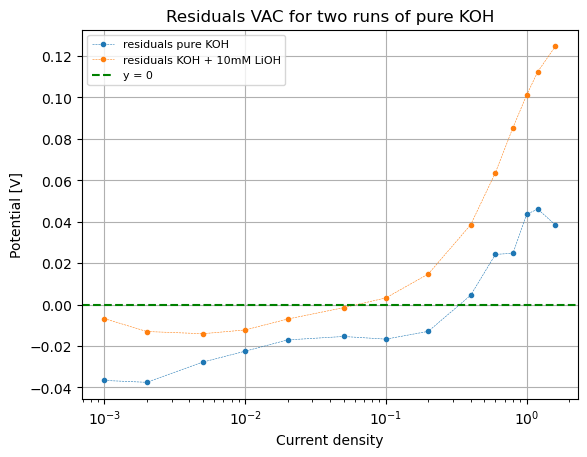

In [390]:
residuals1 = experiments[1].overpotential - experiments[0].overpotential
residuals2 = experiments[1].overpotential - experiments[3].overpotential
plt.plot(exp.JR_dataframe['J'], residuals1, label = 'residuals pure KOH' ,  marker = '.', linestyle = '--', lw = 0.4)
plt.plot(exp.JR_dataframe['J'], residuals2, label = 'residuals KOH + 10mM LiOH' ,  marker = '.', linestyle = '--', lw = 0.4)
plt.axhline(y=0, linestyle = '--', color = 'green', label = 'y = 0')
plt.grid()
plt.title('Residuals VAC for two runs of pure KOH')
plt.xlabel('Current density')
plt.ylabel('Potential [V]')
plt.xscale('log')
plt.legend(fontsize = 8)



In [391]:
#checking if LiOH has impact on overpotential
data = {
    'x': np.tile(np.log(experiments[0].JR_dataframe['J'].values), len(experiments)-1),
    'y': np.array([experiments[i].overpotential for i in range(1,len(experiments))]).flatten(),
    'group': np.repeat(['Pure', '5mM', '10mM', '25mM', '50mM', '100mM'], 14)
}


model = ols('y ~ C(group) * x', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

if anova_table['PR(>F)'][0] < 0.05:
    print('LiOH content has significant influence')
else:
    print('LiOH content has no significant influence')


LiOH content has significant influence


In [394]:
#Checking if runs for pure KOH are the same
data = {
    'x': np.tile(np.log(experiments[0].JR_dataframe['J'].values), 2),
    'y': np.array([experiments[i].overpotential for i in [0,1]]).flatten(),
    'group': np.repeat(['Pure, run1', 'Pure, run2'], 14)
}


model = ols('y ~ C(group) * x', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

if anova_table['PR(>F)'][0] < 0.05:
    print('The experiments are the same')
else:
    print('The experiments are different')

The experiments are different
